Import necessary Libraries



In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
!pip3 install -U ucimlrepo

Dataset sourced from:
https://archive.ics.uci.edu/dataset/320/student+performance
Provided by P. Cortez

In [77]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
student_performance = fetch_ucirepo(id=320)

# data (as pandas dataframes)
X = student_performance.data.features
y = student_performance.data.targets

df = pd.concat([X,y], axis = 1)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


Plot correlation heatmap to check which factors affect G3 the most

<ipython-input-78-419cce1d9f11>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().round(1),annot=True)


<Axes: >

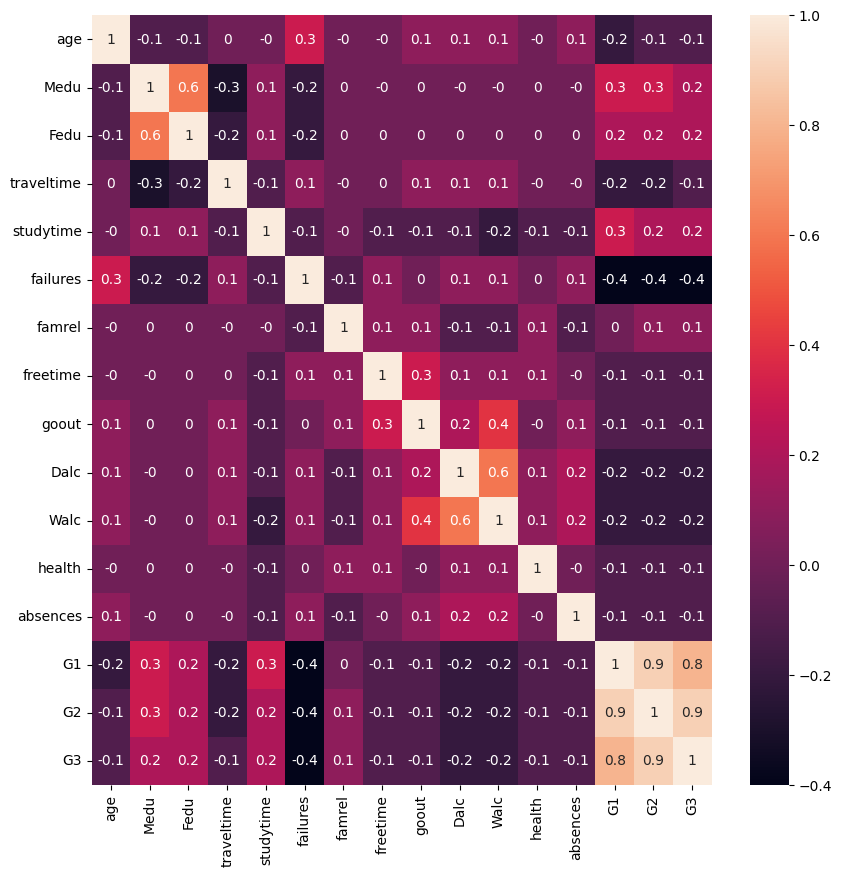

In [78]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr().round(1),annot=True)

Trim dataframe to include only the columns with most impact on G3

In [79]:
df=df[['failures','G1','G2','G3']]
df

,failures,G1,G2,G3
0,0,0,11,11
1,0,9,11,11
2,0,12,13,12
3,0,14,14,14
4,0,11,13,13
...,...,...,...,...
644,1,10,11,10
645,0,15,15,16
646,0,11,12,9
647,0,10,10,10


Set X and y values using index locations

In [80]:
X=df.iloc[:,:-1].values
y=df.iloc[:,3].values

Split the dataframe into a 80:20 ratio 80% for training and 20% for validation

In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

Import Linear Regression from sklearn library and fit the model to the training data

In [82]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

Check accuracy of the model against testing data

In [83]:
print(lr.score(X_test,y_test))

0.845677718560449


Plot a colorcoded scatter plot with the regression line to better visualize the testing data

<ipython-input-84-be36fec4f207>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('viridis', len(unique_grades))


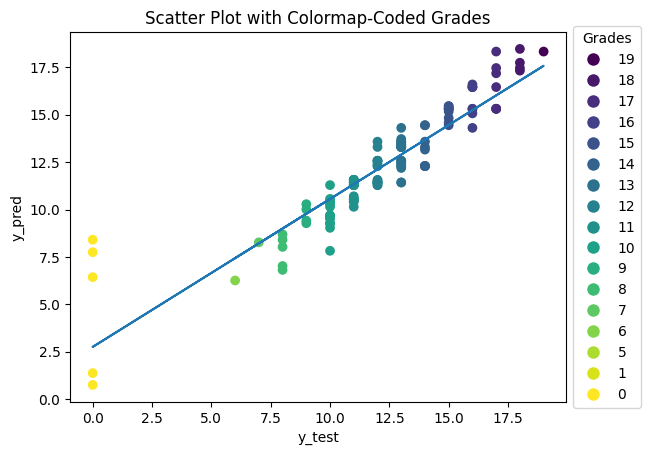

In [84]:
y_pred=lr.predict(X_test)

import matplotlib.cm as cm
unique_grades = df['G3'].unique()
unique_grades = -np.sort(-unique_grades)
colors = cm.get_cmap('viridis', len(unique_grades))

color_map = {unique_grades:colors for unique_grades,colors in zip(unique_grades, colors(np.linspace(0, 1, len(unique_grades))))}
pred_df = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
plt.scatter(y_test,y_pred, c=pred_df['y_test'].map(color_map), label=pred_df['y_test'])

plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Scatter Plot with Colormap-Coded Grades')
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label=grade,
                markerfacecolor=color, markersize=10) for grade, color in color_map.items()]

m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test + b)

plt.legend(handles=legend_labels, title='Grades', loc='center left',bbox_to_anchor=(1,0.5))

plt.show()

Below is the code to make predictions using your own individual data input

In [85]:
#replace the code in the array with your own desired input in the format Failures:G1:G2
pred=np.array([1,12,13]).reshape(1,-1)
lr.predict(pred)

array([13.05906846])